# Weather and Motor Vehicle Collisions

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
from dateutil.rrule import rrule, DAILY
from __future__ import division
import geoplotlib as glp
from geoplotlib.utils import BoundingBox, DataAccessObject

pd.set_option('display.max_columns', None)
%matplotlib inline  

## Read weather data from csv file

In [2]:
weather = pd.read_csv('datasets/weather_data_nyc_kjfk_clean2.csv')
incidents = pd.read_csv("datasets/NYPD_Motor_Vehicle_Collisions_weather4.csv")
weather['date'] = weather.Year.astype('str') +'/'+ weather.Month.astype('str') +'/'+ weather.Day.astype('str') +'/'+ weather.Hour.astype('str')



/Users/masve/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/masve/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
conditions = list(weather.Conditions.unique())
condic = {}
for cond in conditions:
    condic[cond] = 0;
condic

{'Blowing Snow': 0,
 'Clear': 0,
 'Fog': 0,
 'Haze': 0,
 'Heavy Rain': 0,
 'Heavy Snow': 0,
 'Heavy Thunderstorms and Rain': 0,
 'Ice Pellets': 0,
 'Light Drizzle': 0,
 'Light Freezing Drizzle': 0,
 'Light Freezing Rain': 0,
 'Light Ice Pellets': 0,
 'Light Rain': 0,
 'Light Rain Showers': 0,
 'Light Snow': 0,
 'Light Thunderstorms and Rain': 0,
 'Mist': 0,
 'Mostly Cloudy': 0,
 'Overcast': 0,
 'Partly Cloudy': 0,
 'Patches of Fog': 0,
 'Rain': 0,
 'Scattered Clouds': 0,
 'Shallow Fog': 0,
 'Snow': 0,
 'Squalls': 0,
 'Thunderstorm': 0,
 'Thunderstorms and Rain': 0,
 'Thunderstorms with Small Hail': 0,
 'Unknown': 0}

*** Frequency of measured weather conditions from 7/1/2012 to 3/1/2016, on hourly basis ***

In [4]:
for d in weather.date.unique():
    condi = weather[weather.date == d]['Conditions'].iloc[0]
    condic[condi] += 1

condic

{'Blowing Snow': 3,
 'Clear': 2142,
 'Fog': 212,
 'Haze': 107,
 'Heavy Rain': 96,
 'Heavy Snow': 11,
 'Heavy Thunderstorms and Rain': 18,
 'Ice Pellets': 2,
 'Light Drizzle': 291,
 'Light Freezing Drizzle': 8,
 'Light Freezing Rain': 41,
 'Light Ice Pellets': 11,
 'Light Rain': 1759,
 'Light Rain Showers': 1,
 'Light Snow': 569,
 'Light Thunderstorms and Rain': 49,
 'Mist': 15,
 'Mostly Cloudy': 10366,
 'Overcast': 5823,
 'Partly Cloudy': 4102,
 'Patches of Fog': 7,
 'Rain': 295,
 'Scattered Clouds': 6060,
 'Shallow Fog': 9,
 'Snow': 33,
 'Squalls': 2,
 'Thunderstorm': 27,
 'Thunderstorms and Rain': 15,
 'Thunderstorms with Small Hail': 1,
 'Unknown': 7}

## Get frequency of collision per hour of specific weather condition

In [5]:
conditionCount = {}
for c in incidents.Conditions.unique():
    if (pd.notnull(c)):
        mask = ((incidents.Conditions == c))
        filtered_incidents = incidents[mask]
        conditionCount[c] = filtered_incidents.size
    
conditionCount

{'Blowing Snow': 884,
 'Clear': 1043732,
 'Fog': 116518,
 'Haze': 112200,
 'Heavy Rain': 82246,
 'Heavy Snow': 5644,
 'Heavy Thunderstorms and Rain': 21522,
 'Ice Pellets': 1496,
 'Light Drizzle': 229636,
 'Light Freezing Drizzle': 4760,
 'Light Freezing Rain': 30770,
 'Light Ice Pellets': 13090,
 'Light Rain': 1548632,
 'Light Rain Showers': 1326,
 'Light Snow': 479026,
 'Light Thunderstorms and Rain': 52258,
 'Mist': 9826,
 'Mostly Cloudy': 8756700,
 'Overcast': 3677100,
 'Partly Cloudy': 2912236,
 'Patches of Fog': 2346,
 'Rain': 267410,
 'Scattered Clouds': 5272788,
 'Shallow Fog': 3366,
 'Snow': 45628,
 'Squalls': 1564,
 'Thunderstorm': 29104,
 'Thunderstorms and Rain': 8670,
 'Thunderstorms with Small Hail': 1190,
 'Unknown': 6834}

In [6]:
# Calculate ratios
ratios = {}

for k,v in conditionCount.iteritems():
    conditionCountValue = conditionCount[k]
    weatherConditionCountValue = condic[k]
    ratio =  conditionCountValue / weatherConditionCountValue
    ratios[k] = ratio
    #print "%s: %s" % (k, ratio)
    
# Normalize ratios
#factor = 1.0/sum(ratios.itervalues())
#for k in ratios:
#    ratios[k] = ratios[k]*factor

reference = ratios["Mostly Cloudy"]

for k in ratios:
    ratios[k] = (ratios[k]/reference)*100

ratios

{'Blowing Snow': 34.882029379408529,
 'Clear': 57.681994068578057,
 'Fog': 65.062072577957025,
 'Haze': 124.13087378006628,
 'Heavy Rain': 101.41782339998706,
 'Heavy Snow': 60.738638569739337,
 'Heavy Thunderstorms and Rain': 141.54054228952307,
 'Ice Pellets': 88.546689963113963,
 'Light Drizzle': 93.41523649029547,
 'Light Freezing Drizzle': 70.434867016113373,
 'Light Freezing Rain': 88.841191149244054,
 'Light Ice Pellets': 140.86973403222675,
 'Light Rain': 104.22049290505748,
 'Light Rain Showers': 156.96913220733839,
 'Light Snow': 99.659235891541186,
 'Light Thunderstorms and Rain': 126.24885201605393,
 'Mist': 77.545434543454348,
 'Mostly Cloudy': 100.0,
 'Overcast': 74.753130372588132,
 'Partly Cloudy': 84.043018728121126,
 'Patches of Fog': 39.673516931525086,
 'Rain': 107.30658190445166,
 'Scattered Clouds': 103.00028332477977,
 'Shallow Fog': 44.273344981556981,
 'Snow': 163.67721478030157,
 'Squalls': 92.571539506891867,
 'Thunderstorm': 127.60263738792179,
 'Thunderstor

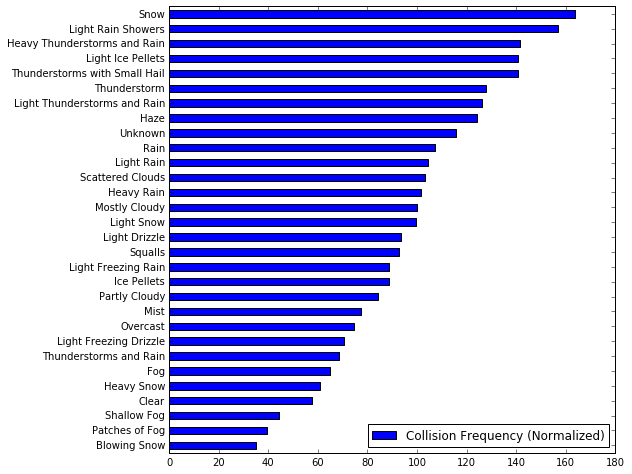

In [7]:
# Plot ratios

df = pd.DataFrame(pd.Series(ratios, name="Collision Frequency (Normalized)").sort_values())
df.plot(kind='barh', figsize=(8,8))

In [25]:
# Export to json for d3 viz
from collections import OrderedDict
import json
with open('datasets/freq_weather.json', 'w') as fp:
    json.dump(OrderedDict(sorted(ratios.items(), key=lambda x: x[1], reverse=True)), fp)

In [18]:
OrderedDict(ratios)

OrderedDict([('Light Drizzle', 93.41523649029547),
             ('Mostly Cloudy', 100.0),
             ('Unknown', 115.57067975705134),
             ('Snow', 163.67721478030157),
             ('Haze', 124.13087378006628),
             ('Fog', 65.062072577957025),
             ('Shallow Fog', 44.273344981556981),
             ('Light Snow', 99.659235891541186),
             ('Scattered Clouds', 103.00028332477977),
             ('Ice Pellets', 88.546689963113963),
             ('Light Freezing Rain', 88.841191149244054),
             ('Light Rain', 104.22049290505748),
             ('Thunderstorm', 127.60263738792179),
             ('Rain', 107.30658190445166),
             ('Light Thunderstorms and Rain', 126.24885201605393),
             ('Patches of Fog', 39.673516931525086),
             ('Heavy Snow', 60.738638569739337),
             ('Light Rain Showers', 156.96913220733839),
             ('Clear', 57.681994068578057),
             ('Overcast', 74.753130372588132),
             (

In [24]:
sorted(ratios.items(), key=lambda x: x[1], reverse=True)

[('Snow', 163.67721478030157),
 ('Light Rain Showers', 156.96913220733839),
 ('Heavy Thunderstorms and Rain', 141.54054228952307),
 ('Thunderstorms with Small Hail', 140.86973403222675),
 ('Light Ice Pellets', 140.86973403222675),
 ('Thunderstorm', 127.60263738792179),
 ('Light Thunderstorms and Rain', 126.24885201605393),
 ('Haze', 124.13087378006628),
 ('Unknown', 115.57067975705134),
 ('Rain', 107.30658190445166),
 ('Light Rain', 104.22049290505748),
 ('Scattered Clouds', 103.00028332477977),
 ('Heavy Rain', 101.41782339998706),
 ('Mostly Cloudy', 100.0),
 ('Light Snow', 99.659235891541186),
 ('Light Drizzle', 93.41523649029547),
 ('Squalls', 92.571539506891867),
 ('Light Freezing Rain', 88.841191149244054),
 ('Ice Pellets', 88.546689963113963),
 ('Partly Cloudy', 84.043018728121126),
 ('Mist', 77.545434543454348),
 ('Overcast', 74.753130372588132),
 ('Light Freezing Drizzle', 70.434867016113373),
 ('Thunderstorms and Rain', 68.422442244224428),
 ('Fog', 65.062072577957025),
 ('Heav